In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pathlib import Path
import pandas as pd
import seaborn as sns
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict as ddict
from pprint import pprint

%matplotlib inline

In [2]:
def load_pkl(f):
    with open(f, "rb") as fi:
        data = pickle.load(fi)
    return data

In [3]:
def getPlotData(data):
    means = []
    UpQs = []
    LowQs = []
    theta0s = []
    for key, item in data.items():
        theta0s.append(float(key)) 
        means.append(np.mean(item))
        UpQs.append(np.quantile(item, 0.975))
        LowQs.append(np.quantile(item, 0.025))
    sortIdxs = np.argsort(theta0s)
    theta0s = np.array(theta0s)[sortIdxs]
    means = np.array(means)[sortIdxs]
    UpQs = np.array(UpQs)[sortIdxs]
    LowQs = np.array(LowQs)[sortIdxs]
    return edict({"means": means, "theta0s":theta0s, 
             "UpQs": UpQs, "LowQs":LowQs})
    

# 1. obtain the data 

In [4]:
root = Path("./")

## 1.1 UIPD-M

In [5]:
rawUIPDM = load_pkl(root/"Boxplot_M_UIPD100.pkl")

In [6]:
UIPDM = ddict(list)
for dat in rawUIPDM:
    for key, item in dat.items():
        UIPDM[key].append(np.mean(item))

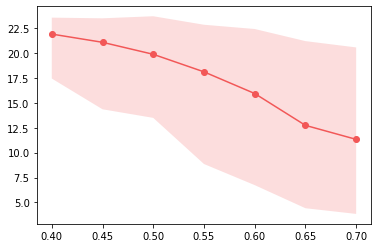

In [7]:
plotData = getPlotData(UIPDM)
plt.plot(plotData.theta0s, plotData.means, "o-", color="#F25757")
plt.fill_between(plotData.theta0s, plotData.LowQs, plotData.UpQs, 
                 alpha=0.2, facecolor="#F25757")

## 1.2 UIPD-w

In [8]:
rawUIPDw = load_pkl(root/"Boxplot_w_UIPD100.pkl")

In [9]:
UIPDm1 = ddict(list)
UIPDm2 = ddict(list)
UIPDw1 = ddict(list)
UIPDw2 = ddict(list)
for dat in rawUIPDw:
    for key in dat[0].keys():
        ws = dat[0][key]
        Ms = dat[1][key]
        ms = ws * Ms.reshape(-1, 1)
        w = ws.mean(axis=0)
        m = ms.mean(axis=0)
        UIPDw1[key].append(w[0])
        UIPDw2[key].append(w[1])
        UIPDm1[key].append(m[0])
        UIPDm2[key].append(m[1])

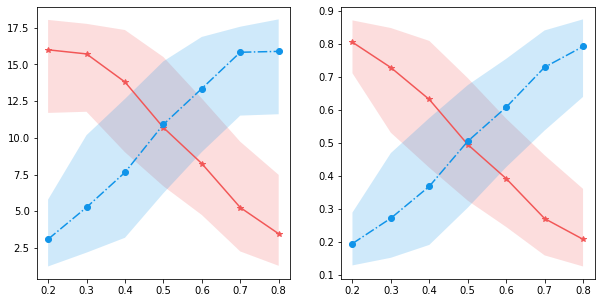

In [10]:
plotDatam1 = getPlotData(UIPDm1)
plotDatam2 = getPlotData(UIPDm2)
plotDataw1 = getPlotData(UIPDw1)
plotDataw2 = getPlotData(UIPDw2)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.plot(plotDatam1.theta0s, plotDatam1.means, "*-", color="#F25757")
plt.fill_between(plotDatam1.theta0s, plotDatam1.LowQs, plotDatam1.UpQs, 
                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDatam2.theta0s, plotDatam2.means, "o-.", color="#1094E9")
plt.fill_between(plotDatam2.theta0s, plotDatam2.LowQs, plotDatam2.UpQs, 
                 alpha=0.2, facecolor="#1094E9")

plt.subplot(122)
plt.plot(plotDataw1.theta0s, plotDataw1.means, "-*", color="#F25757")
plt.fill_between(plotDataw1.theta0s, plotDataw1.LowQs, plotDataw1.UpQs, 
                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDataw2.theta0s, plotDataw2.means, "o-.", color="#1094E9")
plt.fill_between(plotDataw2.theta0s, plotDataw2.LowQs, plotDataw2.UpQs, 
                 alpha=0.2, facecolor="#1094E9")

## 1.3 UIPJS-M

In [11]:
rawUIPJSM = load_pkl(root/"Boxplot_M_UIPJS100.pkl")

In [12]:
UIPJSM = ddict(list)
for dat in rawUIPJSM:
    for key, item in dat.items():
        UIPJSM[key].append(np.mean(item))

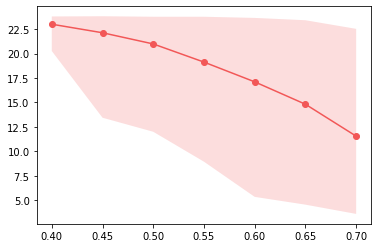

In [13]:
plotData = getPlotData(UIPJSM)
plt.plot(plotData.theta0s, plotData.means, "o-", color="#F25757")
plt.fill_between(plotData.theta0s, plotData.LowQs, plotData.UpQs, 
                 alpha=0.2, facecolor="#F25757")

## 1.2 UIPJS-w

In [14]:
rawUIPJSw = load_pkl(root/"Boxplot_w_UIPJS100.pkl")

In [15]:
UIPJSm1 = ddict(list)
UIPJSm2 = ddict(list)
UIPJSw1 = ddict(list)
UIPJSw2 = ddict(list)
for dat in rawUIPJSw:
    for key in dat[0].keys():
        ws = dat[0][key]
        Ms = dat[1][key]
        ms = ws * Ms.reshape(-1, 1)
        m = ms.mean(axis=0)
        UIPJSw1[key].append(ws[0])
        UIPJSw2[key].append(ws[1])
        UIPJSm1[key].append(m[0])
        UIPJSm2[key].append(m[1])

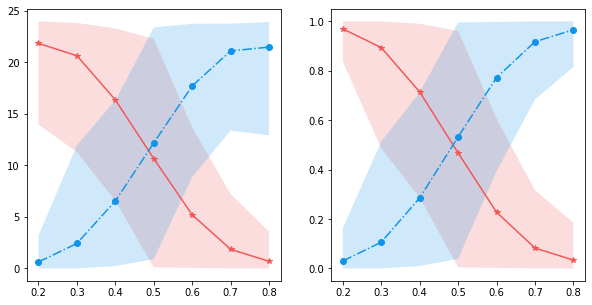

In [16]:
plotDatam1 = getPlotData(UIPJSm1)
plotDatam2 = getPlotData(UIPJSm2)
plotDataw1 = getPlotData(UIPJSw1)
plotDataw2 = getPlotData(UIPJSw2)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.plot(plotDatam1.theta0s, plotDatam1.means, "*-", color="#F25757")
plt.fill_between(plotDatam1.theta0s, plotDatam1.LowQs, plotDatam1.UpQs, 
                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDatam2.theta0s, plotDatam2.means, "o-.", color="#1094E9")
plt.fill_between(plotDatam2.theta0s, plotDatam2.LowQs, plotDatam2.UpQs, 
                 alpha=0.2, facecolor="#1094E9")

plt.subplot(122)
plt.plot(plotDataw1.theta0s, plotDataw1.means, "-*", color="#F25757")
plt.fill_between(plotDataw1.theta0s, plotDataw1.LowQs, plotDataw1.UpQs, 
                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDataw2.theta0s, plotDataw2.means, "o-.", color="#1094E9")
plt.fill_between(plotDataw2.theta0s, plotDataw2.LowQs, plotDataw2.UpQs, 
                 alpha=0.2, facecolor="#1094E9")

# 2. Plot the results

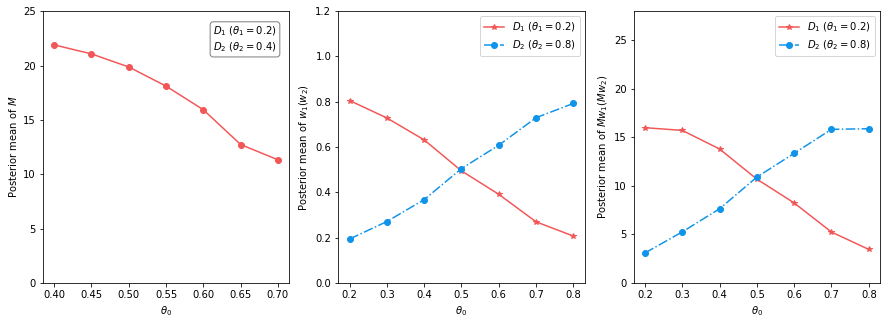

In [18]:
plotData = getPlotData(UIPDM)
plotDatam1 = getPlotData(UIPDm1)
plotDatam2 = getPlotData(UIPDm2)
plotDataw1 = getPlotData(UIPDw1)
plotDataw2 = getPlotData(UIPDw2)

fig = plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.ylim([0, 25])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"Posterior mean of $M$")
plt.plot(plotData.theta0s, plotData.means, "o-", color="#F25757")
#plt.fill_between(plotData.theta0s, plotData.LowQs, plotData.UpQs, 
#                 alpha=0.2, facecolor="#F25757")
plt.annotate('$D_1$ $(\\theta_1=0.2)$\n$D_2$ $(\\theta_2=0.4)$', xy=(0.95, 0.95), xycoords='axes fraction',
            size=10, ha='right', va='top', ma="left",
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))


plt.subplot(1, 3, 2)
plt.ylim([0, 1.2])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"Posterior mean of $w_1(w_2)$")
plt.plot(plotDataw1.theta0s, plotDataw1.means, "-*", color="#F25757", label=r"$D_1$ $(\theta_1=$" + "0.2)")
#plt.fill_between(plotDataw1.theta0s, plotDataw1.LowQs, plotDataw1.UpQs, 
#                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDataw2.theta0s, plotDataw2.means, "o-.", color="#1094E9", label=r"$D_2$ $(\theta_2=$" + "0.8)")
#plt.fill_between(plotDataw2.theta0s, plotDataw2.LowQs, plotDataw2.UpQs, 
#                 alpha=0.2, facecolor="#1094E9")
plt.legend()

plt.subplot(1, 3, 3)
plt.ylim([0, 28])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"Posterior mean of $Mw_1(Mw_2)$")
plt.plot(plotDatam1.theta0s, plotDatam1.means, "*-", color="#F25757", label=r"$D_1$ $(\theta_1=$" + "0.2)")
#plt.fill_between(plotDatam1.theta0s, plotDatam1.LowQs, plotDatam1.UpQs, 
#                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDatam2.theta0s, plotDatam2.means, "o-.", color="#1094E9", label=r"$D_2$ $(\theta_2=$" + "0.8)")
#plt.fill_between(plotDatam2.theta0s, plotDatam2.LowQs, plotDatam2.UpQs, 
#                 alpha=0.2, facecolor="#1094E9")
_ = plt.legend()

plt.savefig("../plots/SIM-R1/dynaBernUIPD.pdf")

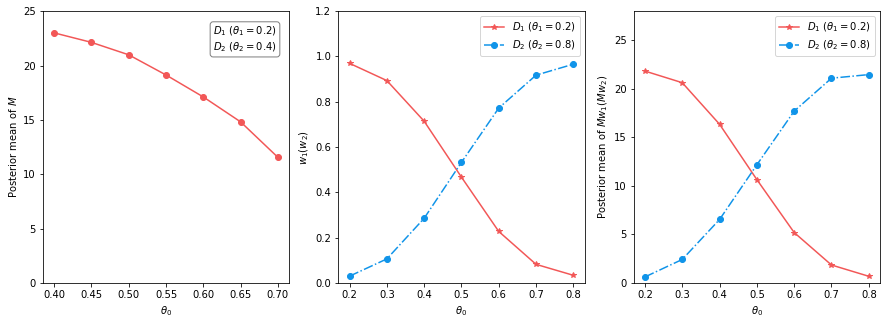

In [19]:
plotData = getPlotData(UIPJSM)
plotDatam1 = getPlotData(UIPJSm1)
plotDatam2 = getPlotData(UIPJSm2)
plotDataw1 = getPlotData(UIPJSw1)
plotDataw2 = getPlotData(UIPJSw2)

fig = plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.ylim([0, 25])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"Posterior mean of $M$")
plt.plot(plotData.theta0s, plotData.means, "o-", color="#F25757")
#plt.fill_between(plotData.theta0s, plotData.LowQs, plotData.UpQs, 
#                 alpha=0.2, facecolor="#F25757")

plt.annotate('$D_1$ $(\\theta_1=0.2)$\n$D_2$ $(\\theta_2=0.4)$', xy=(0.95, 0.95), xycoords='axes fraction',
            size=10, ha='right', va='top', ma="left",
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))

plt.subplot(1, 3, 2)
plt.ylim([0, 1.2])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$w_1(w_2)$")
plt.plot(plotDataw1.theta0s, plotDataw1.means, "-*", color="#F25757", label=r"$D_1$ $(\theta_1=$" + "0.2)")
#plt.fill_between(plotDataw1.theta0s, plotDataw1.LowQs, plotDataw1.UpQs, 
#                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDataw2.theta0s, plotDataw2.means, "o-.", color="#1094E9", label=r"$D_2$ $(\theta_2=$" + "0.8)")
#plt.fill_between(plotDataw2.theta0s, plotDataw2.LowQs, plotDataw2.UpQs, 
#                 alpha=0.2, facecolor="#1094E9")
plt.legend()

plt.subplot(1, 3, 3)
plt.ylim([0, 28])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"Posterior mean of $Mw_1(Mw_2)$")
plt.plot(plotDatam1.theta0s, plotDatam1.means, "*-", color="#F25757", label=r"$D_1$ $(\theta_1=$" + "0.2)")
#plt.fill_between(plotDatam1.theta0s, plotDatam1.LowQs, plotDatam1.UpQs, 
#                 alpha=0.2, facecolor="#F25757")
plt.plot(plotDatam2.theta0s, plotDatam2.means, "o-.", color="#1094E9", label=r"$D_2$ $(\theta_2=$" + "0.8)")
#plt.fill_between(plotDatam2.theta0s, plotDatam2.LowQs, plotDatam2.UpQs, 
#                 alpha=0.2, facecolor="#1094E9")
_ = plt.legend()

plt.savefig("../plots/SIM-R1/dynaBernUIPJS.pdf")